<div style="text-align:center;color:white; font-size:1.3rem; background-color:black ;padding:15px">
  <h1>Crime Data Analysis: Status and Victim Age Prediction</h1>
</div/style>


<div style="text-align:center;color:gray ; font-size:1.5rem"> <h1>Regression</h1></div>

## Project Members
### Fizza Tehreem
### Laiba Khan
### Javeria Ishaq

In [65]:
#import pandas and numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
#Load data
df=pd.read_csv('CrimeData.csv')
df


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Martial Status,Income Level,Occupation,Health Status
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,Single,Low Income,Student,Mental issue
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,Divorced,Middle,Self Employed,Middle
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,Single,Low Income,Student,Mental issue
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,Single,Low Income,Student,Mental issue
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,Married,Low Middle,Unemployed,Measles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984040,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284,Single,Low Income,Student,Mental issue
984041,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460,Single,Low Income,Student,Mental issue
984042,240410786,10/14/2024 12:00:00 AM,10/11/2024 12:00:00 AM,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,NaN,NaN,1700 ALBION ST,NaN,34.0675,-118.2240,Married,Low Middle,Unemployed,Low Middle
984043,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868,Widowed,Higher,Retired,E. coli


<div style="text-align:center;color:green ; font-size:1.2rem"> <h1>Data Preprocessing</h1></div>

In [66]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984045 entries, 0 to 984044
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           984045 non-null  int64  
 1   Date Rptd       984045 non-null  object 
 2   DATE OCC        984045 non-null  object 
 3   TIME OCC        984045 non-null  int64  
 4   AREA            984045 non-null  int64  
 5   AREA NAME       984045 non-null  object 
 6   Rpt Dist No     984045 non-null  int64  
 7   Part 1-2        984045 non-null  int64  
 8   Crm Cd          984045 non-null  int64  
 9   Crm Cd Desc     984045 non-null  object 
 10  Mocodes         837566 non-null  object 
 11  Vict Age        984045 non-null  int64  
 12  Vict Sex        844481 non-null  object 
 13  Vict Descent    844471 non-null  object 
 14  Premis Cd       984031 non-null  float64
 15  Premis Desc     983489 non-null  object 
 16  Weapon Used Cd  324280 non-null  float64
 17  Weapon Des

In [67]:
df['Status'].value_counts().head(40)

Status
IC    785542
AO    107459
AA     85960
JA      3262
JO      1815
CC         6
Name: count, dtype: int64

In [68]:
#Drop unnecessary columns
df=df.drop(['LON','LAT','LOCATION','Crm Cd 4','Crm Cd 3','Crm Cd 2','DR_NO','Date Rptd','DATE OCC','TIME OCC'],axis=1)

In [69]:
#Drop columns that have no relation with your problem
df=df.drop(['AREA','AREA NAME','Rpt Dist No','Cross Street','Premis Desc'],axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984045 entries, 0 to 984044
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        984045 non-null  int64  
 1   Crm Cd          984045 non-null  int64  
 2   Crm Cd Desc     984045 non-null  object 
 3   Mocodes         837566 non-null  object 
 4   Vict Age        984045 non-null  int64  
 5   Vict Sex        844481 non-null  object 
 6   Vict Descent    844471 non-null  object 
 7   Premis Cd       984031 non-null  float64
 8   Weapon Used Cd  324280 non-null  float64
 9   Weapon Desc     324280 non-null  object 
 10  Status          984044 non-null  object 
 11  Status Desc     984045 non-null  object 
 12  Crm Cd 1        984034 non-null  float64
 13  Martial Status  984045 non-null  object 
 14  Income Level    984045 non-null  object 
 15  Occupation      984045 non-null  object 
 16  Health Status   984045 non-null  object 
dtypes: float64

In [72]:
df=df.dropna(subset=['Mocodes','Vict Sex','Vict Descent'],axis=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837341 entries, 1 to 984043
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        837341 non-null  int64  
 1   Crm Cd          837341 non-null  int64  
 2   Crm Cd Desc     837341 non-null  object 
 3   Mocodes         837341 non-null  object 
 4   Vict Age        837341 non-null  int64  
 5   Vict Sex        837341 non-null  object 
 6   Vict Descent    837341 non-null  object 
 7   Premis Cd       837341 non-null  float64
 8   Weapon Used Cd  323518 non-null  float64
 9   Weapon Desc     323518 non-null  object 
 10  Status          837341 non-null  object 
 11  Status Desc     837341 non-null  object 
 12  Crm Cd 1        837331 non-null  float64
 13  Martial Status  837341 non-null  object 
 14  Income Level    837341 non-null  object 
 15  Occupation      837341 non-null  object 
 16  Health Status   837341 non-null  object 
dtypes: float64(3), 

In [79]:
df.columns

Index(['Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'Martial Status', 'Income Level',
       'Occupation', 'Health Status'],
      dtype='object')

In [81]:
df=df.dropna(subset=['Weapon Desc'],axis=0)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323518 entries, 9 to 984043
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        323518 non-null  int64  
 1   Crm Cd          323518 non-null  int64  
 2   Crm Cd Desc     323518 non-null  object 
 3   Mocodes         323518 non-null  object 
 4   Vict Age        323518 non-null  int64  
 5   Vict Sex        323518 non-null  object 
 6   Vict Descent    323518 non-null  object 
 7   Premis Cd       323518 non-null  float64
 8   Weapon Used Cd  323518 non-null  float64
 9   Weapon Desc     323518 non-null  object 
 10  Status          323518 non-null  object 
 11  Status Desc     323518 non-null  object 
 12  Crm Cd 1        323516 non-null  float64
 13  Martial Status  323518 non-null  object 
 14  Income Level    323518 non-null  object 
 15  Occupation      323518 non-null  object 
 16  Health Status   323518 non-null  object 
dtypes: float64(3), 

In [85]:
#Check the null values
df.isna().sum().sum()

2

In [87]:
#Drop rows having null values
df=df.dropna(subset=['Crm Cd 1'],axis=0)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323516 entries, 9 to 984043
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        323516 non-null  int64  
 1   Crm Cd          323516 non-null  int64  
 2   Crm Cd Desc     323516 non-null  object 
 3   Mocodes         323516 non-null  object 
 4   Vict Age        323516 non-null  int64  
 5   Vict Sex        323516 non-null  object 
 6   Vict Descent    323516 non-null  object 
 7   Premis Cd       323516 non-null  float64
 8   Weapon Used Cd  323516 non-null  float64
 9   Weapon Desc     323516 non-null  object 
 10  Status          323516 non-null  object 
 11  Status Desc     323516 non-null  object 
 12  Crm Cd 1        323516 non-null  float64
 13  Martial Status  323516 non-null  object 
 14  Income Level    323516 non-null  object 
 15  Occupation      323516 non-null  object 
 16  Health Status   323516 non-null  object 
dtypes: float64(3), 

In [108]:
#Make sure data have not any null value
df.isna().sum().sum()

0

In [33]:
#Save a copy of Preprocessed data
df.to_csv('Crime_Data_preprocessed.csv',index=False)

In [46]:
#Check the value diffrence in columns
df.describe()

,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1
count,323516.000000,323516.000000,323516.000000,323516.000000,323516.000000,323516.000000
mean,1.546412,508.534292,34.464904,317.809892,364.504167,507.848592
std,0.497842,239.517386,17.973608,216.669035,123.191383,239.016064
min,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000
25%,1.000000,230.000000,23.000000,102.000000,311.000000,230.000000
50%,2.000000,624.000000,33.000000,216.000000,400.000000,624.000000
75%,2.000000,626.000000,46.000000,502.000000,400.000000,626.000000
max,2.000000,956.000000,99.000000,975.000000,516.000000,956.000000


In [94]:
#Convert all categorical columns to integer
df[df.select_dtypes(['object']).columns]=df.select_dtypes(['object']).apply(lambda x:pd.factorize(x)[0])
print(df)

        Part 1-2  Crm Cd  Crm Cd Desc  Mocodes  Vict Age  Vict Sex  \
9              2     624            0        0        26         0   
11             1     821            1        1         8         1   
12             2     812            2        2         7         1   
17             1     230            3        3        31         1   
21             2     812            2        4        12         1   
...          ...     ...          ...      ...       ...       ...   
984034         1     230            3   196254        36         0   
984036         2     624            0   196255        80         1   
984039         1     341           30       64        46         0   
984041         2     745           23    19074         0         2   
984043         1     230            3    78454        70         1   

        Vict Descent  Premis Cd  Weapon Used Cd  Weapon Desc  Status  \
9                  0      502.0           400.0            0       0   
11             

In [96]:
#Check the correlation
correlation=df.corr()
print(correlation)

                Part 1-2    Crm Cd  Crm Cd Desc   Mocodes  Vict Age  Vict Sex  \
Part 1-2        1.000000  0.792549    -0.131720 -0.169693  0.040988  0.104664   
Crm Cd          0.792549  1.000000    -0.006833 -0.146809  0.041475  0.087366   
Crm Cd Desc    -0.131720 -0.006833     1.000000 -0.024288 -0.178207  0.133711   
Mocodes        -0.169693 -0.146809    -0.024288  1.000000 -0.013163  0.000119   
Vict Age        0.040988  0.041475    -0.178207 -0.013163  1.000000 -0.286843   
Vict Sex        0.104664  0.087366     0.133711  0.000119 -0.286843  1.000000   
Vict Descent   -0.080430 -0.060929     0.199922  0.009898 -0.279435  0.417783   
Premis Cd       0.206147  0.195390    -0.044744  0.000388  0.011486  0.114620   
Weapon Used Cd  0.424147  0.364378    -0.033131 -0.103982  0.080230  0.114321   
Weapon Desc    -0.374279 -0.235180     0.106070  0.053518 -0.014791 -0.093197   
Status          0.116395  0.086773    -0.080191 -0.014845  0.014661  0.039854   
Status Desc     0.116395  0.

<Axes: >

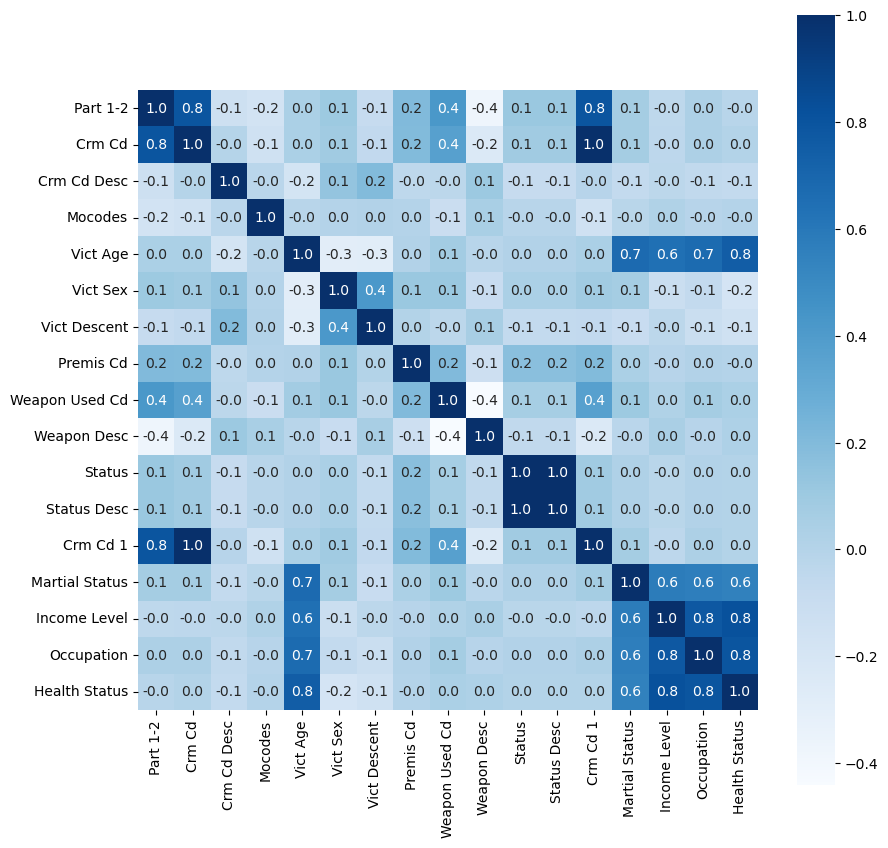

In [98]:
#import matplotlib for making graph
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,10))
#making heatmap
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':10}, cmap='Blues')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323516 entries, 9 to 984043
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        323516 non-null  int64  
 1   Crm Cd          323516 non-null  int64  
 2   Crm Cd Desc     323516 non-null  int64  
 3   Mocodes         323516 non-null  int64  
 4   Vict Age        323516 non-null  int64  
 5   Vict Sex        323516 non-null  int64  
 6   Vict Descent    323516 non-null  int64  
 7   Premis Cd       323516 non-null  float64
 8   Weapon Used Cd  323516 non-null  float64
 9   Weapon Desc     323516 non-null  int64  
 10  Status          323516 non-null  int64  
 11  Status Desc     323516 non-null  int64  
 12  Crm Cd 1        323516 non-null  float64
 13  Martial Status  323516 non-null  int64  
 14  Income Level    323516 non-null  int64  
 15  Occupation      323516 non-null  int64  
 16  Health Status   323516 non-null  int64  
dtypes: float64(3), 

In [102]:
#Seperate the X and Y columns
import numpy as np
X=df.values
Y=df['Vict Age']


In [104]:
#Drop target column from features
X=np.delete(X,4,axis=1)

In [106]:
print(X)

[[  2. 624.   0. ...   0.   0.   0.]
 [  1. 821.   1. ...   1.   1.   1.]
 [  2. 812.   2. ...   1.   1.   1.]
 ...
 [  1. 341.  30. ...   2.   3.   6.]
 [  2. 745.  23. ...   1.   1.   1.]
 [  1. 230.   3. ...   4.   4.  10.]]


In [108]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X_scaler[:1]

array([[ 0.91110983,  0.48207727, -0.72064156, -1.11537076, -0.95434989,
        -0.77190605,  0.85010021,  0.28813613, -0.51807122, -0.76649357,
        -0.76649357,  0.48595724, -1.35582678, -1.28734878, -1.56769076,
        -1.38775063]])

In [112]:
#convert high dimensions to low dimensions
from sklearn.decomposition import PCA
pca=PCA(n_components=7)  #I changes many times n_components values but at 48 it gives best resuults
X_pca=pca.fit_transform(X_scaler)
print(X_pca.shape)

(323516, 7)


In [114]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_pca,Y,test_size=0.20 ,random_state=20)

<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Random Forest</h1></div>

In [165]:
#import the random forest from sklearn
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_estimators=5, random_state=26)

In [167]:
#fit the model with X and Y data 
mdl.fit(X_Train, Y_Train) 
RandomForestRegressor(n_estimators=5, random_state=26)

RandomForestRegressor(n_estimators=5, random_state=26)

In [168]:
training_data_prediction = mdl.predict(X_Train)
print(training_data_prediction)

[52.4  0.  67.4 ... 29.2 44.2 67.2]


In [169]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 
# R squared error
score_1 = metrics.r2_score(Y_Train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Train, 
training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9835526228814107
Mean Absolute Error :  1.3136856895921007


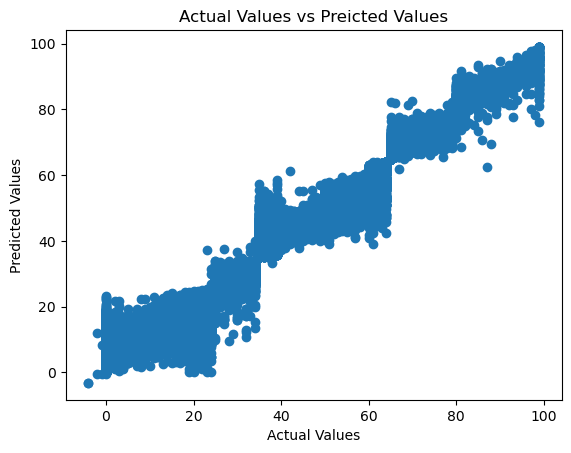

In [170]:
#Draw training accuracy using using matplotlib
import matplotlib.pyplot as plt
plt.scatter(Y_Train,training_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Preicted Values")
plt.show()

In [171]:
#predict the values based on testing samples
y_pred=mdl.predict(X_Test)
print(y_pred)

[29.4        22.85619048 54.6        ... 29.6        29.8
 26.4       ]


In [172]:
#graphical  representation of testing accuracy
score_1=metrics.r2_score(Y_Test,y_pred)
score_2=metrics.mean_absolute_error(Y_Test,y_pred)
print("R sqquared",score_1)
print("Mean absolute error",score_2)

R sqquared 0.9259465037770922
Mean absolute error 3.2484040742875315


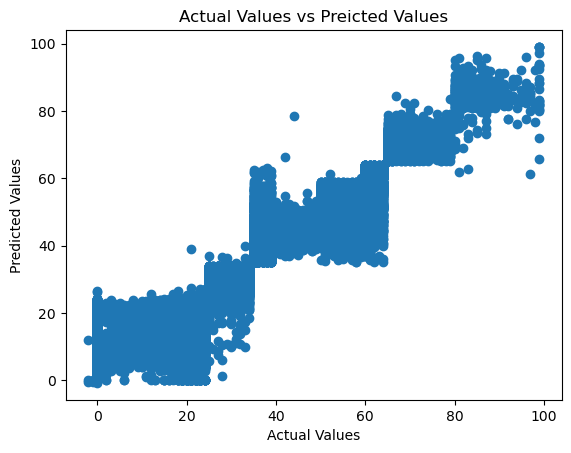

In [173]:
#graphical  representation of testing accuracy
plt.scatter(Y_Test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Preicted Values")
plt.show()

<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Decision Tree</h1></div>

In [133]:
#Apply decision tree algorithm
from sklearn.tree import DecisionTreeRegressor
mdl=DecisionTreeRegressor(random_state=26)
mdl.fit(X_Train,Y_Train)
DecisionTreeRegressor(random_state=26)

DecisionTreeRegressor(random_state=26)

In [134]:
#predict the training values
training_data_prediction = mdl.predict(X_Train)
print(training_data_prediction)

[53.  0. 68. ... 29. 48. 66.]


In [135]:
# R squared score
score_1 = metrics.r2_score(Y_Train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Train,training_data_prediction)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared score :  0.9988802839601155
Mean Absolute Error :  0.08812352931722349


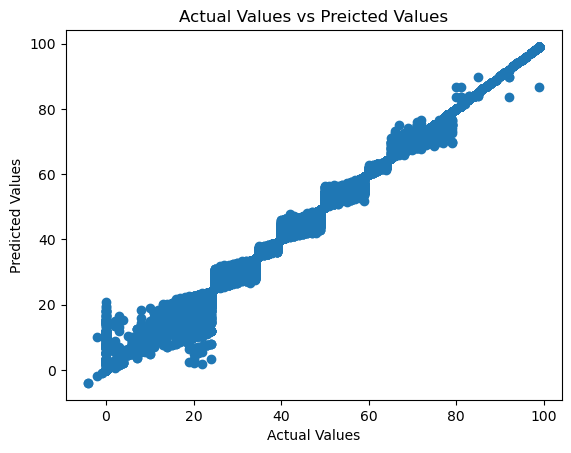

In [136]:
#graphical  representation of training accuracy
plt.scatter(Y_Train, training_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Preicted Values")
plt.show()

In [137]:
#Prediction of Y
y_pred = mdl.predict(X_Test)
y_pred

array([30.  , 22.75, 52.  , ..., 31.  , 30.  , 25.  ])

In [138]:
# R squared score
score_1 = metrics.r2_score(Y_Test, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Test, y_pred)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared score :  0.8917890683125568
Mean Absolute Error :  3.446914152675637


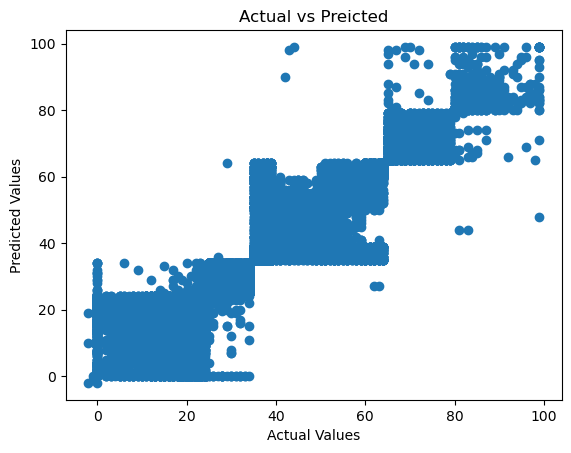

In [145]:
#graphical  representation of testing accuracy
plt.scatter(Y_Test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Preicted")
plt.show()

<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>Linear Regression</h1></div>

In [147]:
#Train the linear regression model on training samples
from sklearn.linear_model import LinearRegression
mdl=LinearRegression()
mdl.fit(X_Train,Y_Train)
LinearRegression()

LinearRegression()

In [153]:
#Predict the training target columns for checking the accuracy
trainig_data_prediction=mdl.predict(X_Train)
print(trainig_data_prediction)

[46.19297333  9.93062379 62.43280224 ... 26.21852614 50.1631006
 55.67329086]


In [155]:
#Checking the training accuracy
score_1=metrics.r2_score(Y_Train,trainig_data_prediction)
score_2=metrics.mean_absolute_error(Y_Train,trainig_data_prediction)
print("R sqquared",score_1)
print("Mean absolute error",score_2)

R sqquared 0.677830949540586
Mean absolute error 8.430327804048142


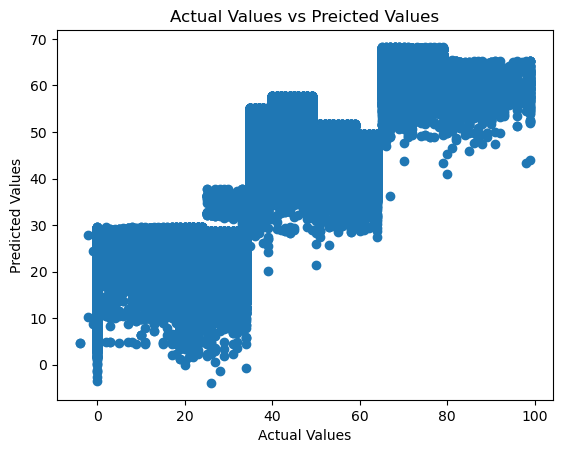

In [157]:
#Draw training accuracy using using matplotlib
plt.scatter(Y_Train, trainig_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Preicted Values")
plt.show()

In [159]:
#predict the values based on testing samples
y_pred=mdl.predict(X_Test)
print(y_pred)

[28.2269372  25.13845945 45.78394343 ... 21.07497422 18.64237391
 24.42510977]


In [161]:
#graphical  representation of testing accuracy
score_1=metrics.r2_score(Y_Test,y_pred)
score_2=metrics.mean_absolute_error(Y_Test,y_pred)
print("R sqquared",score_1)
print("Mean absolute error",score_2)

R sqquared 0.6780564389868918
Mean absolute error 8.406476564623501


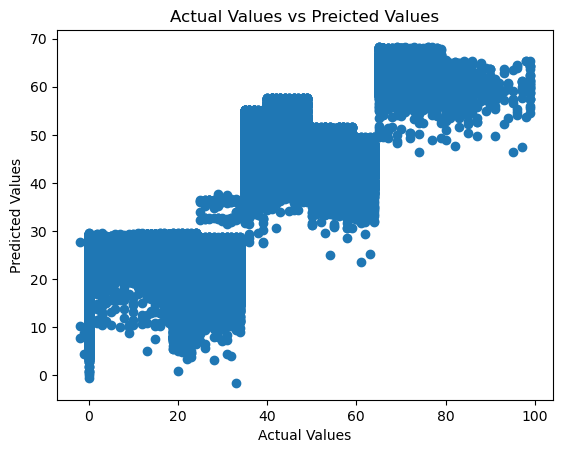

In [163]:
#graphical  representation of testing accuracy
plt.scatter(Y_Test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Preicted Values")
plt.show()

<div style="text-align:center;color:red ; font-size:1.5rem"> <h1> For SVM Drop Half samples</h1></div>

## SVM model was not trained because of large data set there we have to drop some sample and made a small dataset

In [2]:

df=pd.read_csv('Crime_Data_Preprocessed.csv')
df

,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Martial Status,Income Level,Occupation,Health Status
0,2,624,BATTERY - SIMPLE ASSAULT,0416,26,M,H,502.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,Married,Low Middle,Unemployed,Measles
1,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,0913 2024 1817 0360 1258 0507,8,F,H,501.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,Single,Low Income,Student,Mental issue
2,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1251 1258 0913 0400 0500 0522 1817,7,F,W,502.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,Single,Low Income,Student,Mental issue
3,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1309 0400,31,F,O,101.0,307.0,VEHICLE,AA,Adult Arrest,230.0,Relationship,Low Middle,Manual Labor,Meningitis
4,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1259 0913 1817 1801 0503,12,F,H,502.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812.0,Single,Low Income,Student,Mental issue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323511,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 1822 1310 0416,36,M,H,101.0,207.0,OTHER KNIFE,IC,Invest Cont,230.0,Married,Upper Middle,Engineer,Alzheimer's disease
323512,2,624,BATTERY - SIMPLE ASSAULT,2047 0400 0429 0444 1202 1822,80,F,O,124.0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,Separated,Upper Middle,Retired,Syphilis
323513,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344,46,M,H,223.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,341.0,Divorced,Middle,Self Employed,Middle
323514,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,0,X,X,503.0,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,Single,Low Income,Student,Mental issue


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323516 entries, 0 to 323515
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Part 1-2        323516 non-null  int64  
 1   Crm Cd          323516 non-null  int64  
 2   Crm Cd Desc     323516 non-null  object 
 3   Mocodes         323516 non-null  object 
 4   Vict Age        323516 non-null  int64  
 5   Vict Sex        323516 non-null  object 
 6   Vict Descent    323516 non-null  object 
 7   Premis Cd       323516 non-null  float64
 8   Weapon Used Cd  323516 non-null  float64
 9   Weapon Desc     323516 non-null  object 
 10  Status          323516 non-null  object 
 11  Status Desc     323516 non-null  object 
 12  Crm Cd 1        323516 non-null  float64
 13  Martial Status  323516 non-null  object 
 14  Income Level    323516 non-null  object 
 15  Occupation      323516 non-null  object 
 16  Health Status   323516 non-null  object 
dtypes: float64

In [4]:
df[df.select_dtypes(['object']).columns]=df.select_dtypes(['object']).apply(lambda x : pd.factorize (x)[0])
df

,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Martial Status,Income Level,Occupation,Health Status
0,2,624,0,0,26,0,0,502.0,400.0,0,0,0,624.0,0,0,0,0
1,1,821,1,1,8,1,0,501.0,400.0,0,0,0,812.0,1,1,1,1
2,2,812,2,2,7,1,1,502.0,400.0,0,0,0,812.0,1,1,1,1
3,1,230,3,3,31,1,2,101.0,307.0,1,1,1,230.0,2,0,2,2
4,2,812,2,4,12,1,0,502.0,400.0,0,2,2,812.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323511,1,230,3,196254,36,0,0,101.0,207.0,14,0,0,230.0,0,3,5,7
323512,2,624,0,196255,80,1,2,124.0,400.0,0,0,0,624.0,5,3,4,8
323513,1,341,30,64,46,0,0,223.0,500.0,2,0,0,341.0,4,2,3,6
323514,2,745,23,19074,0,2,7,503.0,500.0,2,0,0,745.0,1,1,1,1


In [5]:
import pandas as pd
import numpy as np



# Set a seed for reproducibility
np.random.seed(42)

# Specify the number of samples to delete
num_samples_to_delete = 240347

# Generate random indices to delete
indices_to_delete = np.random.choice(df.index, num_samples_to_delete, replace=False)

# Drop the samples
df_dropped = df.drop(indices_to_delete)

print(df_dropped)


        Part 1-2  Crm Cd  Crm Cd Desc  Mocodes  Vict Age  Vict Sex  \
5              2     812            2        5         7         1   
8              2     930            4        8        29         1   
13             2     626            6       13        25         1   
14             1     210            7       14        62         0   
15             2     626            6       15        29         1   
...          ...     ...          ...      ...       ...       ...   
323505         2     624            0   196249        60         0   
323506         1     210            7   196250         0         2   
323509         2     624            0   196252        33         0   
323511         1     230            3   196254        36         0   
323512         2     624            0   196255        80         1   

        Vict Descent  Premis Cd  Weapon Used Cd  Weapon Desc  Status  \
5                  0      502.0           400.0            0       0   
8              

In [7]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83169 entries, 5 to 323512
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Part 1-2        83169 non-null  int64  
 1   Crm Cd          83169 non-null  int64  
 2   Crm Cd Desc     83169 non-null  int64  
 3   Mocodes         83169 non-null  int64  
 4   Vict Age        83169 non-null  int64  
 5   Vict Sex        83169 non-null  int64  
 6   Vict Descent    83169 non-null  int64  
 7   Premis Cd       83169 non-null  float64
 8   Weapon Used Cd  83169 non-null  float64
 9   Weapon Desc     83169 non-null  int64  
 10  Status          83169 non-null  int64  
 11  Status Desc     83169 non-null  int64  
 12  Crm Cd 1        83169 non-null  float64
 13  Martial Status  83169 non-null  int64  
 14  Income Level    83169 non-null  int64  
 15  Occupation      83169 non-null  int64  
 16  Health Status   83169 non-null  int64  
dtypes: float64(3), int64(14)
memory usa

In [8]:
import numpy as np
X=df_dropped.values
Y=df_dropped['Vict Age'].values

In [17]:
X=np.delete(X,4,axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[ :1]

array([[ 0.91621634,  1.26957803, -0.56600876, -1.11314913, -0.77157521,
         0.85576458,  0.28858587, -0.5192997 , -0.76761953, -0.76761953,
         1.27469072, -0.68654435, -0.34473487, -0.82910531, -1.01220363]])

In [21]:
#convert high dimensions to low dimensions
from sklearn.decomposition import PCA
pca=PCA(n_components=5)  #I changes many times n_components values but at 48 it gives best resuults
X_pca=pca.fit_transform(X_scaled)
print(X_pca.shape)

(83169, 5)


In [23]:

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.20,random_state=25)

In [25]:
print("The length of X_Train is",len(X_Train))
print("The length of X_Train is",len(Y_Train))
print("The length of X_Train is",len(X_Test))
print("The length of X_Train is",len(Y_Test))

The length of X_Train is 66535
The length of X_Train is 66535
The length of X_Train is 16634
The length of X_Train is 16634


<div style="text-align:center;color:blue ; font-size:1.2rem"> <h1>SVM</h1></div>

In [29]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
svr = SVR(kernel='linear')
pipeline = make_pipeline(scaler, pca, svr)
pipeline.fit(X_Train, Y_Train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)), ('svr', SVR(kernel='linear'))])

In [31]:
#prdict the training values to check training accuracy
training_data_prediction = pipeline.predict(X_Train)
print(training_data_prediction)

[17.01483807 24.78603686 49.64155267 ... 46.33835617 16.44723512
 26.57901713]


In [33]:
score_1 = metrics.r2_score(Y_Train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Train, 
training_data_prediction)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)


R squared score :  0.6523721252999306
Mean Absolute Error :  8.62892055451142


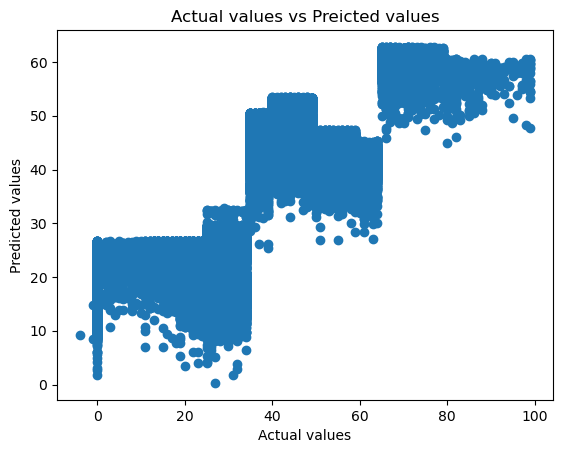

In [39]:
#graphical  representation of training accuracy
import matplotlib.pyplot as plt
plt.scatter(Y_Train, training_data_prediction)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual values vs Preicted values")
plt.show()

In [41]:
y_pred=pipeline.predict(X_Test)
print(y_pred)

[23.91150369 26.02260322 43.72830944 ... 20.3389929  18.14700766
 41.77494016]


In [42]:
score_1 = metrics.r2_score(Y_Test,y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Test,y_pred)
print("R squared score of testing: ", score_1)
print('Mean Absolute Error of testing: ', score_2)

R squared score of testing:  0.6422153531051137
Mean Absolute Error of testing:  8.769772824441429


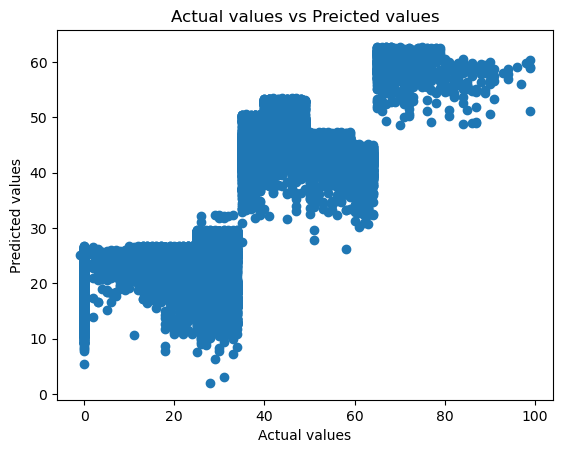

In [43]:
plt.scatter(Y_Test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual values vs Preicted values")
plt.show()

<div style="text-align:center;color:red ; font-size:1.5rem"> <h1>Results</h1></div>

#### Random Forest: Training 98% Testing 93%
#### Decision Tress: Training 99% Testing 89%
#### Linear regression: Training 67% Testing 67%
#### SVM: Training 64% Testing 64%

<div style="text-align:center;color:red ; font-size:1.5rem"> <h1>Best  Results</h1></div>

# Random Forest gives best results 98% in training and 93% in testing